# Make a prediction about the coal production

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()


In [161]:
df = pd.read_csv("../data/cleaned_coalpublic2013.csv", index_col="MSHA ID")
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours,log_production
MSHA ID,,,,,,,,,,,,,,,,
103381,2013,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,10.933178
103404,2013,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Independent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,10.268374
100759,2013,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,14.180234
103246,2013,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,11.380388
103451,2013,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,11.901577


In [162]:
len(df)

1061

In [163]:
for c in df.columns:
    print c

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours
log_production


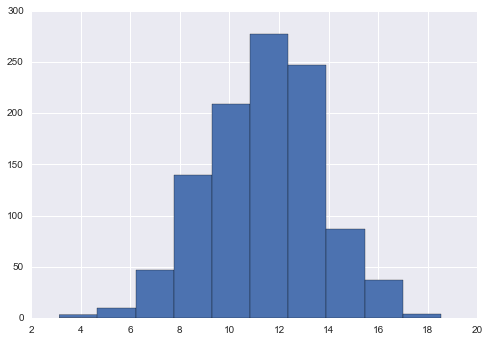

In [164]:
# production of coal follows a log normal distribution... 
df["log_production"].hist()

In [165]:
df.Mine_Status.unique()

array(['Active, men working, not producing', 'Permanently abandoned',
       'Active', 'Temporarily closed', 'New, under construction'], dtype=object)

In [166]:
df[['Mine_Status', 'log_production']].groupby('Mine_Status').mean()

,log_production
Mine_Status,
Active,11.977453
"Active, men working, not producing",10.499962
"New, under construction",3.951244
Permanently abandoned,9.896046
Temporarily closed,9.162933


# Predict Production of Coal Mines

In [167]:
df.Union_Code.unique()

array([' ', 'UNIT', 'United Mine Workers of America', 'INTE',
       'International Union of Operation Engineers',
       'Scotia Employees Association', 'Western Energy Workers'], dtype=object)

In [168]:
features = [
            'Average_Employees',
            'Labor_Hours',
            ]
categoricals =  [
            'Mine_State',
            'Mine_County',
            'Mine_Status',
            'Mine_Type',
            'Company_Type',
            'Operation_Type',
            'Union_Code',
            'Coal_Supply_Region',
            ]
target = 'log_production'



<function matplotlib.pyplot.tight_layout>

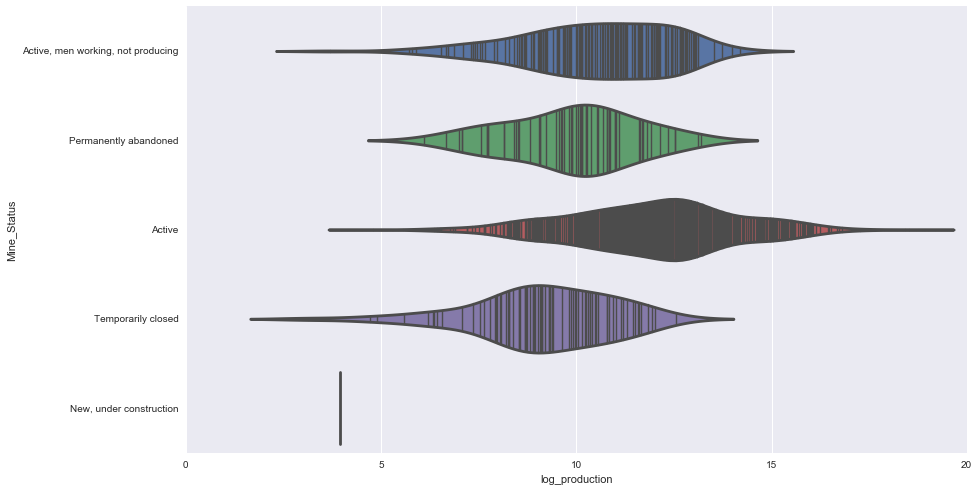

In [169]:
# compare minestatus to log_production
fig=plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y='Mine_Status', x='log_production', data=df, split=True, inner='stick',)
plt.tight_layout


<function matplotlib.pyplot.tight_layout>

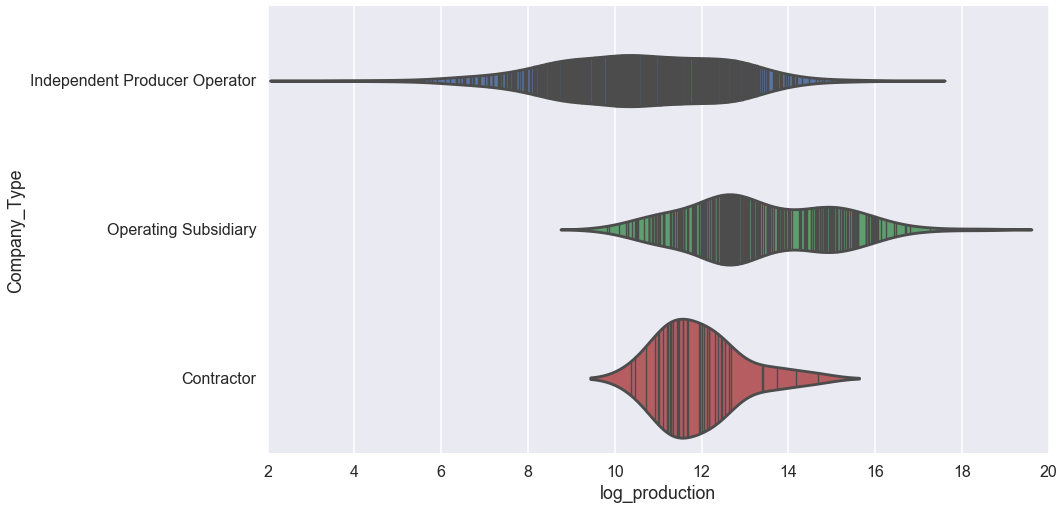

In [170]:
# compare company_type to log_production
fig=plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y='Company_Type', x='log_production', data=df, split=True, inner='stick',)
plt.tight_layout


In [171]:
pd.get_dummies(df['Company_Type']).sample(50).head()

,Contractor,Independent Producer Operator,Operating Subsidiary
MSHA ID,,,
4608906,0.0,1.0,0.0
4607545,0.0,0.0,1.0
4609468,0.0,1.0,0.0
4608194,0.0,1.0,0.0
3304414,0.0,1.0,0.0


In [172]:
df_saved = df

In [177]:
df = df_saved

In [179]:
sorted(df[c].unique())[-1]

'Western'

In [178]:
print categoricals
dummy_categoricals=[]
dummy_no_drop=[]


for c in categoricals:
    print c, len(df[c].unique())
    drop_var = sorted(df[c].unique())[-1]
    #print "DROPVAR", drop_var
    temp_df = pd.get_dummies(df[c],prefix=c)
    
    #print "temp_DF", temp_df
    df = pd.concat([df, temp_df], axis=1)
    print "DROPPING",'_'.join([c, str(drop_var)])
    temp_df.drop('_'.join([c, str(drop_var)]), axis=1, inplace=True)
    dummy_categoricals += temp_df.columns.tolist()
    #print "----",dummy_categoricals

['Mine_State', 'Mine_County', 'Mine_Status', 'Mine_Type', 'Company_Type', 'Operation_Type', 'Union_Code', 'Coal_Supply_Region']
Mine_State 29
DROPPING Mine_State_Wyoming
Mine_County 164
DROPPING Mine_County_Wyoming
Mine_Status 5
DROPPING Mine_Status_Temporarily closed
Mine_Type 3
DROPPING Mine_Type_Underground
Company_Type 3
DROPPING Company_Type_Operating Subsidiary
Operation_Type 2
DROPPING Operation_Type_Mine only
Union_Code 7
DROPPING Union_Code_Western Energy Workers
Coal_Supply_Region 8
DROPPING Coal_Supply_Region_Western


#    BUILD MODEL

In [199]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
len(dummy_categoricals)

213

In [205]:
 train, test = train_test_split(df, test_size=0.3)
    

In [206]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

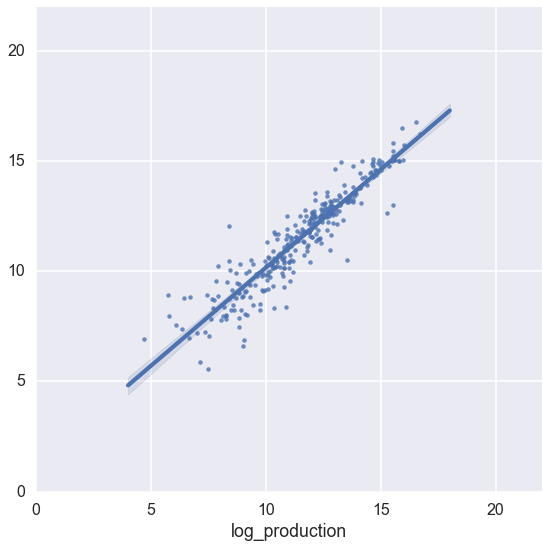

In [207]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target], rf.predict(test[features +dummy_categoricals]))
plt.xlim(0,22)
plt.ylim(0,22)
plt.tight_layout()

In [208]:
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error

In [209]:
predicted=rf.predict(test[features+dummy_categoricals])
r2_score(test[target], predicted)

0.86463045709753295

In [226]:
explained_variance_score(test[target], predicted)

0.86463883588359802

In [227]:
mean_squared_error(test[target],predicted)

0.68132756223987723

In [212]:
rf_importance=pd.DataFrame({'name':train[features+dummy_categoricals].columns,
                            'importance':rf.feature_importances_
                            }).sort_values(by='importance', ascending=False).reset_index(drop=True)
rf_importance.head(20)

,importance,name
0,0.821828,Labor_Hours
1,0.084612,Average_Employees
2,0.007158,Coal_Supply_Region_Powder River Basin
3,0.007084,Mine_Type_Surface
4,0.004272,Mine_County_Martin
5,0.004198,Mine_Status_Active
6,0.003594,Coal_Supply_Region_Appalachia Central
7,0.003502,Mine_State_West Virginia (Southern)
8,0.003038,Mine_County_Boone
9,0.002881,Coal_Supply_Region_Illinois Basin


In [230]:
## JUS TPOKING AROUND -- delete the rest from here down. 

type(train)
train.head()
len(train)

742

In [241]:
train.columns.sort_values()

Index([u'Average_Employees', u'Coal_Supply_Region',
       u'Coal_Supply_Region_Appalachia Central',
       u'Coal_Supply_Region_Appalachia Northern',
       u'Coal_Supply_Region_Appalachia Southern',
       u'Coal_Supply_Region_Illinois Basin', u'Coal_Supply_Region_Interior',
       u'Coal_Supply_Region_Powder River Basin',
       u'Coal_Supply_Region_Uinta Region', u'Coal_Supply_Region_Western',
       ...
       u'Union_Code', u'Union_Code_ ', u'Union_Code_INTE',
       u'Union_Code_International Union of Operation Engineers',
       u'Union_Code_Scotia Employees Association', u'Union_Code_UNIT',
       u'Union_Code_United Mine Workers of America',
       u'Union_Code_Western Energy Workers', u'Year', u'log_production'],
      dtype='object', length=237)

In [240]:
print train[features+dummy_categoricals].columns.sort_values()

Index([u'Average_Employees', u'Coal_Supply_Region_Appalachia Central',
       u'Coal_Supply_Region_Appalachia Northern',
       u'Coal_Supply_Region_Appalachia Southern',
       u'Coal_Supply_Region_Illinois Basin', u'Coal_Supply_Region_Interior',
       u'Coal_Supply_Region_Powder River Basin',
       u'Coal_Supply_Region_Uinta Region', u'Company_Type_Contractor',
       u'Company_Type_Independent Producer Operator',
       ...
       u'Mine_Status_Permanently abandoned', u'Mine_Type_Refuse',
       u'Mine_Type_Surface', u'Operation_Type_Mine and Preparation Plant',
       u'Union_Code_ ', u'Union_Code_INTE',
       u'Union_Code_International Union of Operation Engineers',
       u'Union_Code_Scotia Employees Association', u'Union_Code_UNIT',
       u'Union_Code_United Mine Workers of America'],
      dtype='object', length=215)
